In [1]:
import numpy as np
np.seterr(divide='ignore')
import math
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/train_indessa.csv")

In [3]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
data["loan_status"].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [6]:
data=data.drop(["zip_code"], axis = 1)

In [7]:
data

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,10+ years,MORTGAGE,75000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,MI,14.53,0.0,0.0,NaN,51.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,10+ years,MORTGAGE,59000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,MI,22.97,0.0,0.0,NaN,81.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,8 years,RENT,42504.0,Verified,n,NaN,debt_consolidation,Debt consolidation,TN,27.27,0.0,1.0,26.0,NaN,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,1 year,RENT,50000.0,Source Verified,n,NaN,credit_card,Credit card refinancing,OH,14.91,0.0,1.0,NaN,NaN,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [11]:
categoricalFeatures=df.select_dtypes(include=['O']).columns.values

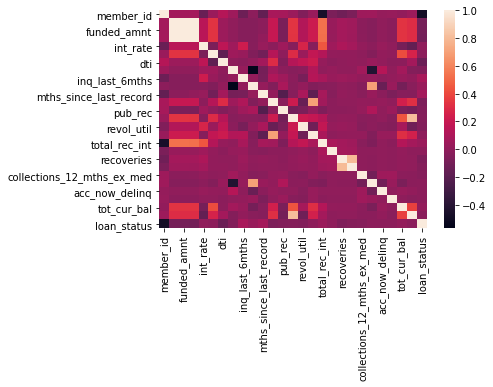

In [4]:
sns.heatmap(data.corr())

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in categoricalFeatures:
  data[feature]= label_encoder.fit_transform(data[feature].astype("str")) 

In [15]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,0,0,19.19,4,22,166902,9,4,28700.0,1,0,70477,2,10357,9,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,3,62,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,0,9,10.99,1,8,68595,10,1,65000.0,1,0,70477,4,16026,20,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,NaN,0,3,96,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,0,9,7.26,0,3,46755,2,4,45000.0,0,0,70477,2,10357,35,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,NaN,0,3,96,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,0,80,19.72,3,19,154077,1,5,105000.0,0,0,44557,2,10357,45,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,NaN,0,3,13,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,0,35,10.64,1,6,77455,1,5,52000.0,2,0,70477,1,38259,4,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,NaN,0,3,95,0.0,0.0,47159.0,47033.0,0


In [40]:
X=data.drop(["loan_status"],axis=1)

In [41]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X)
imputed_train = imp_mean.transform(X)

In [45]:
y=data["loan_status"]

In [46]:
y.isna().sum()

0

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(imputed_train)

In [48]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

In [51]:
lr.fit(imputed_train, y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
test=pd.read_csv("/content/drive/MyDrive/test_indessa.csv")

In [53]:
test

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,19145105,15000,15000,15000.0,36 months,BAT4217242,6.49,A,A2,Network administrator,1 year,MORTGAGE,97250.0,Not Verified,n,NaN,credit_card,Credit card refinancing,761xx,TX,12.46,0.0,0.0,77.0,NaN,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,77.0,INDIVIDUAL,NaN,83th week,0.0,0.0,143920.0,44000.0
354947,46304777,35000,35000,35000.0,60 months,,25.89,G,G3,Credit Risk Analyst,1 year,OWN,180000.0,Verified,n,NaN,debt_consolidation,Debt consolidation,115xx,NY,11.78,2.0,2.0,19.0,NaN,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,772713.0,85700.0
354948,903745,14000,14000,13975.0,60 months,BAT6117184,17.51,E,E4,USPS/Nashua L&DC,10+ years,OWN,56000.0,Verified,n,I will be using the loan money to pay off the ...,home_improvement,Debt Consolidation,038xx,NH,16.44,0.0,3.0,54.0,103.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87th week,0.0,NaN,NaN,NaN
354949,53032475,20000,20000,20000.0,36 months,BAT3840785,7.26,A,A4,Computer Engineer,< 1 year,MORTGAGE,100000.0,Source Verified,n,NaN,credit_card,Credit card refinancing,206xx,MD,15.00,0.0,0.0,NaN,NaN,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,35th week,0.0,0.0,291998.0,54600.0


In [54]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in categoricalFeatures:
  test[feature]= label_encoder.fit_transform(test[feature].astype("str")) 

In [55]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(test)
imputed_test = imp_mean.transform(test)

In [56]:
imputed_test

array([[11937648, 14000, 14000, ..., 0.0, 85230.0, 45700.0],
       [38983318, 16000, 16000, ..., 0.0, 444991.0, 21400.0],
       [27999917, 11050, 11050, ..., 0.0, 105737.0, 16300.0],
       ...,
       [903745, 14000, 14000, ..., 0.0, 0.0, 15000.0],
       [53032475, 20000, 20000, ..., 0.0, 291998.0, 54600.0],
       [994245, 2700, 2700, ..., 0.0, 0.0, 15000.0]], dtype=object)

In [63]:
y_pred = lr.predict(imputed_test)

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y, y_pred)

0.7691630766621286